#### Load Packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### Load dataset

In [9]:
df = pd.read_csv(r"C:\Users\Sree\Downloads\Test-2.csv")
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2013,10.000000,84.5,0.000000,1015.666667
1,02-01-2013,7.400000,92.0,2.980000,1017.800000
2,03-01-2013,7.166667,87.0,4.633333,1018.666667


In [10]:
df =df[['date','meantemp']]

#### Visualize 

<Axes: title={'center': 'temperature count'}>

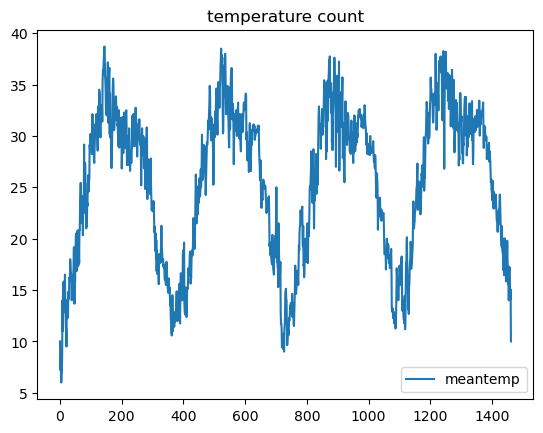

In [11]:
df[['meantemp']].plot(title = 'temperature count')

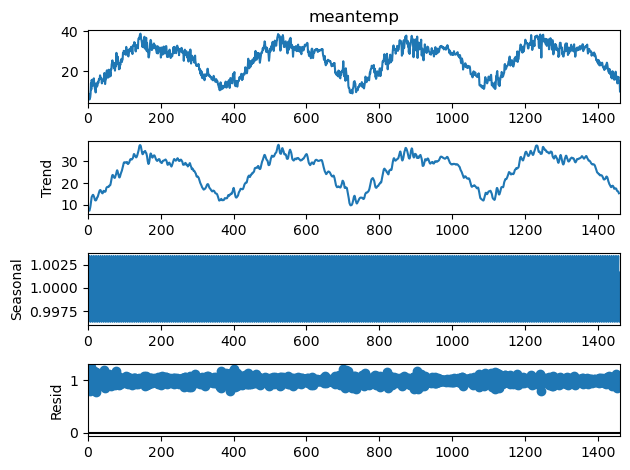

In [15]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(df['meantemp'],model='multiplicative',period=6)
decompose_result.plot()
plt.show()

#### Model

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing graph'}>

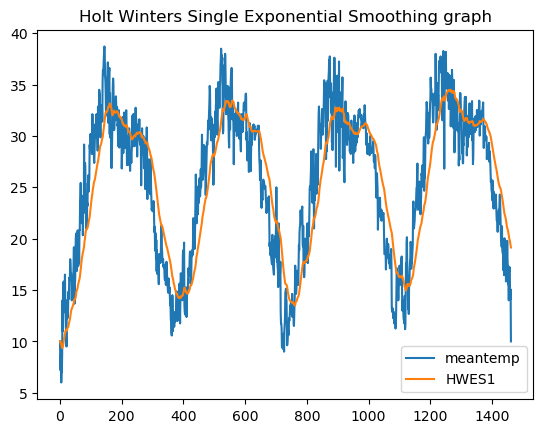

In [20]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)
# Single exponential smoothing of the visitors data set
model = SimpleExpSmoothing(df['meantemp'])
df['HWES1'] = model.fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues     
df[['meantemp','HWES1']].plot(title='Holt Winters Single Exponential Smoothing graph')